As part of your duties as senior data scientist for the famous ThomasTrain company, you are assigned to understand the satisfaction of the customers even without a direct evaluation.
To accomplish this task, the company provided you with the “trains_dataset.csv”.
 Understanding the customers’ satisfaction will help the marketing team to effectively target users with promotions and making the retention higher.


Data Exploration and Cleaning:

Understand the Data Structure: Familiarize yourself with the dataset, understanding each feature and its datatype.
Missing Data Handling: Check for missing or null values and decide how to handle them (e.g., imputation, removal).
Outlier Detection: Identify and address any outliers that may skew your analysis.

Feature Engineering:

New Feature Creation: Based on existing data, create new features that might better capture customer satisfaction (e.g., overall rating average).
Feature Transformation: Normalize or scale features if necessary, especially for continuous variables like age and distance.
Categorical Data Encoding: Convert categorical variables (e.g., Ticket Class, Gender) into a format suitable for modeling (like one-hot encoding).

Exploratory Data Analysis (EDA):

Univariate Analysis: Examine each variable individually to understand its distribution and characteristics.
Bivariate/Multivariate Analysis: Explore relationships between variables, especially how they relate to customer satisfaction.
Correlation Analysis: Assess the correlation between different rating features and customer satisfaction.


## Data Exploration and Cleaning

### Importing libraries

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests

### Reading the input file

In [106]:
df_trains = pd.read_csv('trains.csv')

### Understanding the dataset

Using the function *.head()*, we can extract from the dataset the first x columns (x=5 by default, but we can change this number). They are not useful for analytic purposes, but still enable us to visualize the dataset.

In [107]:
df_trains.head()

Legroom Service Rating  Onboard General Rating  Food'n'Drink Rating  Age  \
0                       3                       5                    5   13   
1                       5                       4                    1   25   
2                       3                       4                    5   26   
3                       5                       4                    2   25   
4                       4                       3                    4   61   

   Departure Arrival Time Rating  Onboard WiFi Rating  Ticket ID  \
0                              4                    3    4718594   
1                              2                    3    1048580   
2                              2                    2    3670024   
3                              5                    2    3145737   
4                              3                    3    5767177   

   Checkin Rating  Track Location Rating  Baggage Handling Rating  ...  \
0               4                      1                        4  ...   
1               1                      3                        3  ...   
2               4                      2                        4  ...   
3               1                      5                        3  ...   
4               3                      3                        4  ...   

   Online Booking Rating Satisfied Onboard Entertainment Rating  \
0                      3         N                            5   
1                      3         N                            1   
2                      2         Y                            5   
3                      5         N                            2   
4                      3         Y                            3   

      Date and Time  Distance  Seat Comfort Rating Work or Leisure  \
0  2016-02-19 10:53       460                    5         leisure   
1  2016-02-26 15:39       235                    1            work   
2  2016-02-26 07:26      1142                    5            work   
3  2016-02-27 08:32       562                    2            work   
4  2016-02-27 14:37       214                    5            work   

   Departure Delay in Minutes Onboard Service Rating  Cleanliness Rating  
0                          25                      4                   5  
1                           1                      1                   1  
2                           0                      4                   5  
3                          11                      2                   2  
4                           0                      3                   3  

[5 rows x 25 columns]

### Showing the dimension of the dataset

In [108]:
df_trains.shape  # outputs number of rows x number of columns

(129880, 25)

The dataset has 129880 rows and 25 columns

### Gathering information from data

The visulaization *.info()* let us notice that almost every column has complete informations (hence, 0 null values), only 'Arrival delay in Minutes' column has some missing values.

Moreover we can see that among 25 variables, only 6 are categorical, while 19 are numerical.

In [109]:
df_trains.info()  # outputs column names and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Legroom Service Rating         129880 non-null  int64  
 1   Onboard General Rating         129880 non-null  int64  
 2   Food'n'Drink Rating            129880 non-null  int64  
 3   Age                            129880 non-null  int64  
 4   Departure Arrival Time Rating  129880 non-null  int64  
 5   Onboard WiFi Rating            129880 non-null  int64  
 6   Ticket ID                      129880 non-null  int64  
 7   Checkin Rating                 129880 non-null  int64  
 8   Track Location Rating          129880 non-null  int64  
 9   Baggage Handling Rating        129880 non-null  int64  
 10  Arrival Delay in Minutes       129487 non-null  float64
 11  Ticket Class                   129880 non-null  object 
 12  Loyalty                       

 df_trains.info() shows that the variable "Arrival Delay in Minutes" is the only variable which presents missing values. It also shows that the variables "Ticket Class", "Loyalty", "Gender", "Satisfied" and "Date and Time" are categoricals, while all the others are integeres or floats numbers.

### Check for duplication

In [110]:
df_trains.nunique()

Legroom Service Rating                6
Onboard General Rating                6
Food'n'Drink Rating                   6
Age                                  75
Departure Arrival Time Rating         6
Onboard WiFi Rating                   6
Ticket ID                        129880
Checkin Rating                        6
Track Location Rating                 6
Baggage Handling Rating               5
Arrival Delay in Minutes            472
Ticket Class                          3
Loyalty                               2
Gender                                2
Boarding Rating                       6
Online Booking Rating                 6
Satisfied                             2
Onboard Entertainment Rating          6
Date and Time                     22667
Distance                           3821
Seat Comfort Rating                   6
Work or Leisure                       2
Departure Delay in Minutes          466
Onboard Service Rating                6
Cleanliness Rating                    6


### Handling missing values

Even though it seems like a data cleaning task, our approach in EDA involves addressing missing values to facilitate data plotting and enhance visualization. Specifically, our method for handling missing values involves replacing them with the mode.

Our aim is to retain maximum information for model accuracy, avoiding deletion of rows or columns. This approach ensures a more comprehensive dataset, supporting the development of a more precise model. 

In [111]:
# Check for missing values

missing_values = df_trains.isnull().sum()
missing_values

Legroom Service Rating             0
Onboard General Rating             0
Food'n'Drink Rating                0
Age                                0
Departure Arrival Time Rating      0
Onboard WiFi Rating                0
Ticket ID                          0
Checkin Rating                     0
Track Location Rating              0
Baggage Handling Rating            0
Arrival Delay in Minutes         393
Ticket Class                       0
Loyalty                            0
Gender                             0
Boarding Rating                    0
Online Booking Rating              0
Satisfied                          0
Onboard Entertainment Rating       0
Date and Time                      0
Distance                           0
Seat Comfort Rating                0
Work or Leisure                    0
Departure Delay in Minutes         0
Onboard Service Rating             0
Cleanliness Rating                 0
dtype: int64

In particular, from this visualization, we notice that 'Arrival Delay in minutes' column has 393 missing values.

In [112]:
(df_trains.isnull().sum()/(len(data)))*100

Legroom Service Rating           0.000000
Onboard General Rating           0.000000
Food'n'Drink Rating              0.000000
Age                              0.000000
Departure Arrival Time Rating    0.000000
Onboard WiFi Rating              0.000000
Ticket ID                        0.000000
Checkin Rating                   0.000000
Track Location Rating            0.000000
Baggage Handling Rating          0.000000
Arrival Delay in Minutes         0.419657
Ticket Class                     0.000000
Loyalty                          0.000000
Gender                           0.000000
Boarding Rating                  0.000000
Online Booking Rating            0.000000
Satisfied                        0.000000
Onboard Entertainment Rating     0.000000
Date and Time                    0.000000
Distance                         0.000000
Seat Comfort Rating              0.000000
Work or Leisure                  0.000000
Departure Delay in Minutes       0.000000
Onboard Service Rating           0

The code above helps to calculate the percentage of missing values in each column. We can notice that the percentage of missing values for the column "Arrival Delay in Minutes " is roughly 0.42%.

In [113]:
for column in df_trains.columns:
    df_trains[column].fillna(df_trains[column].mode()[0], inplace=True)
df_trains.isnull().sum()

Legroom Service Rating           0
Onboard General Rating           0
Food'n'Drink Rating              0
Age                              0
Departure Arrival Time Rating    0
Onboard WiFi Rating              0
Ticket ID                        0
Checkin Rating                   0
Track Location Rating            0
Baggage Handling Rating          0
Arrival Delay in Minutes         0
Ticket Class                     0
Loyalty                          0
Gender                           0
Boarding Rating                  0
Online Booking Rating            0
Satisfied                        0
Onboard Entertainment Rating     0
Date and Time                    0
Distance                         0
Seat Comfort Rating              0
Work or Leisure                  0
Departure Delay in Minutes       0
Onboard Service Rating           0
Cleanliness Rating               0
dtype: int64

We used a single *for* loop, that iterates over the columns of the dataframe and replaces the missing rows of each column with its mode. Using the command *.isnull().sum()*, we notice that there are no longer columns containing missing values.

### Data Reduction

In our dataset, the column "Ticket ID" have only ID values, assuming they don’t have any predictive power to predict the dependent variable. (Probably we should consider to drop of dates and time)

In [114]:
# Remove "Ticket ID" and "Date and time" columns from the dataset
df_trains = df_trains.drop(['Ticket ID'], axis = 1)



### Outlier Detection

## Feature Engineering 

### Categorical Data Encoding 

Convert categorical variables (e.g., Ticket Class, Gender) into a format suitable for modeling

In [135]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns (excluding 'Date and Time' which has already been converted)
categorical_columns = df_trains.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
le = LabelEncoder()

df_trains_cat_not_encoded = df_trains.copy() 
# Apply LabelEncoder to each categorical column
for column in categorical_columns:
    df_trains[column] = le.fit_transform(df_trains[column])



### New Feature Creation 

Based on existing data, create new features that might better capture customer satisfaction (e.g., overall rating average)

In [130]:
# Convert "Date and Time" to datetime format
df_trains['Date and Time'] = pd.to_datetime(df_trains['Date and Time'])

# Extracting hour of the day and day of the week from "Date and Time"
df_trains['Hour of Day'] = df_trains['Date and Time'].dt.hour
df_trains['Day of Week'] = df_trains['Date and Time'].dt.dayofweek  # Monday=0, Sunday=6

# Creating a new feature: Total Satisfaction Score
# Assuming equal weight for all the ratings contributing to overall satisfaction
satisfaction_columns = ['Legroom Service Rating', 'Onboard General Rating', "Food'n'Drink Rating",
                        'Departure Arrival Time Rating', 'Onboard WiFi Rating', 'Checkin Rating',
                        'Track Location Rating', 'Baggage Handling Rating', 'Boarding Rating',
                        'Online Booking Rating', 'Onboard Entertainment Rating', 'Seat Comfort Rating',
                        'Onboard Service Rating', 'Cleanliness Rating']

# Calculate the total satisfaction score
df_trains['Total Satisfaction Score'] = df_trains[satisfaction_columns].sum(axis=1)

# Display the modified dataframe with the new features
df_trains[['Date and Time', 'Hour of Day', 'Day of Week', 'Total Satisfaction Score']].head()

# Drop the previous "Date and Time" variable
df_trains = df_trains.drop('Date and Time', axis=1)

### Feature Transformation

Normalize or scale features if necessary, especially for continuous variables like age and distance.

# EDA Exploratory Data Analysis

Exploratory Data Analysis refers to the crucial process of performing initial investigations on data to discover patterns to check assumptions with the help of summary statistics and graphical representations.

EDA can be leveraged to check for outliers, patterns, and trends in the given data.
EDA helps to find meaningful patterns in data.
EDA provides in-depth insights into the data sets to solve our business problems.
EDA gives a clue to impute missing values in the dataset 

### Statistics Summary

Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

In [142]:
df_trains.describe().T

count         mean         std   min    25%  \
Legroom Service Rating         129880.0     3.350878    1.316252   0.0    2.0   
Onboard General Rating         129880.0     3.642193    1.176669   0.0    3.0   
Food'n'Drink Rating            129880.0     3.204774    1.329933   0.0    2.0   
Age                            129880.0    39.427957   15.119360   7.0   27.0   
Departure Arrival Time Rating  129880.0     3.057599    1.526741   0.0    2.0   
Onboard WiFi Rating            129880.0     2.728696    1.329340   0.0    2.0   
Checkin Rating                 129880.0     3.306267    1.266185   0.0    3.0   
Track Location Rating          129880.0     2.976925    1.278520   0.0    2.0   
Baggage Handling Rating        129880.0     3.632114    1.180025   1.0    3.0   
Arrival Delay in Minutes       129880.0    15.045465   38.416353   0.0    0.0   
Ticket Class                   129880.0     0.623514    0.616170   0.0    0.0   
Loyalty                        129880.0     0.816908    0.386743   0.0    1.0   
Gender                         129880.0     0.492616    0.499947   0.0    0.0   
Boarding Rating                129880.0     3.252633    1.350719   0.0    2.0   
Online Booking Rating          129880.0     2.756876    1.401740   0.0    2.0   
Satisfied                      129880.0     0.434463    0.495688   0.0    0.0   
Onboard Entertainment Rating   129880.0     3.358077    1.334049   0.0    2.0   
Distance                       129880.0  1190.316392  997.452477  31.0  414.0   
Seat Comfort Rating            129880.0     3.441361    1.319289   0.0    2.0   
Work or Leisure                129880.0     0.690584    0.462255   0.0    0.0   
Departure Delay in Minutes     129880.0    14.713713   38.071126   0.0    0.0   
Onboard Service Rating         129880.0     3.383023    1.287099   0.0    2.0   
Cleanliness Rating             129880.0     3.286326    1.313682   0.0    2.0   
Hour of Day                    129880.0    11.387442    6.870842   0.0    5.0   
Day of Week                    129880.0     2.718109    2.060050   0.0    1.0   
Total Satisfaction Score       129880.0    45.377741    9.264191  15.0   39.0   

                                 50%     75%     max  
Legroom Service Rating           4.0     4.0     5.0  
Onboard General Rating           4.0     5.0     5.0  
Food'n'Drink Rating              3.0     4.0     5.0  
Age                             40.0    51.0    85.0  
Departure Arrival Time Rating    3.0     4.0     5.0  
Onboard WiFi Rating              3.0     4.0     5.0  
Checkin Rating                   3.0     4.0     5.0  
Track Location Rating            3.0     4.0     5.0  
Baggage Handling Rating          4.0     5.0     5.0  
Arrival Delay in Minutes         0.0    13.0  1584.0  
Ticket Class                     1.0     1.0     2.0  
Loyalty                          1.0     1.0     1.0  
Gender                           0.0     1.0     1.0  
Boarding Rating                  3.0     4.0     5.0  
Online Booking Rating            3.0     4.0     5.0  
Satisfied                        0.0     1.0     1.0  
Onboard Entertainment Rating     4.0     4.0     5.0  
Distance                       844.0  1744.0  4983.0  
Seat Comfort Rating              4.0     5.0     5.0  
Work or Leisure                  1.0     1.0     1.0  
Departure Delay in Minutes       0.0    12.0  1592.0  
Onboard Service Rating           4.0     4.0     5.0  
Cleanliness Rating               3.0     4.0     5.0  
Hour of Day                     11.0    17.0    23.0  
Day of Week                      3.0     5.0     6.0  
Total Satisfaction Score        46.0    52.0    70.0

ADD comments

### Univariate Analysis

Analyzing/visualizing the dataset by taking one variable at a time:

Legroom Service Rating
Skew : -0.35


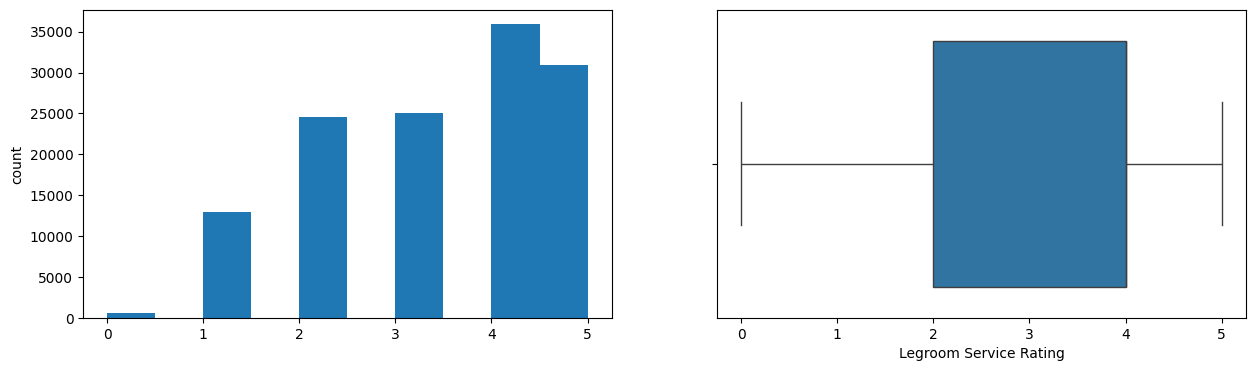

Onboard General Rating
Skew : -0.69


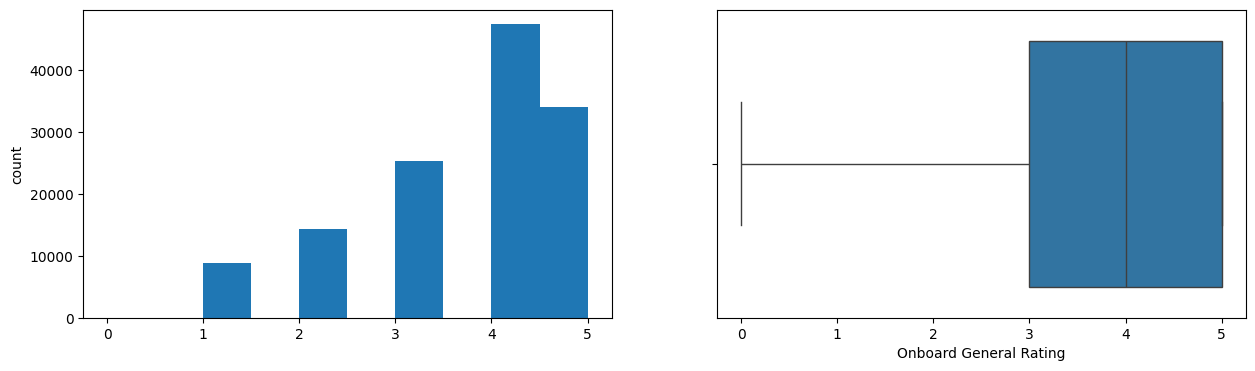

Food'n'Drink Rating
Skew : -0.16


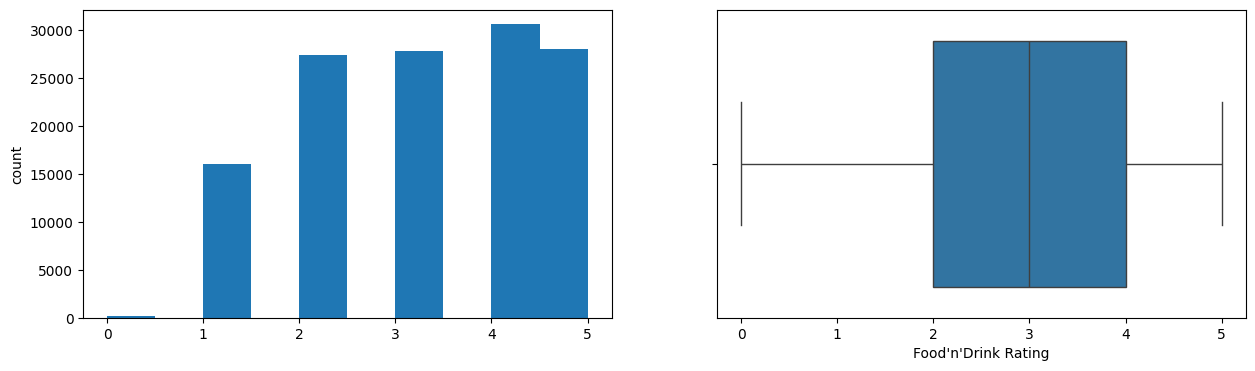

Age
Skew : -0.0


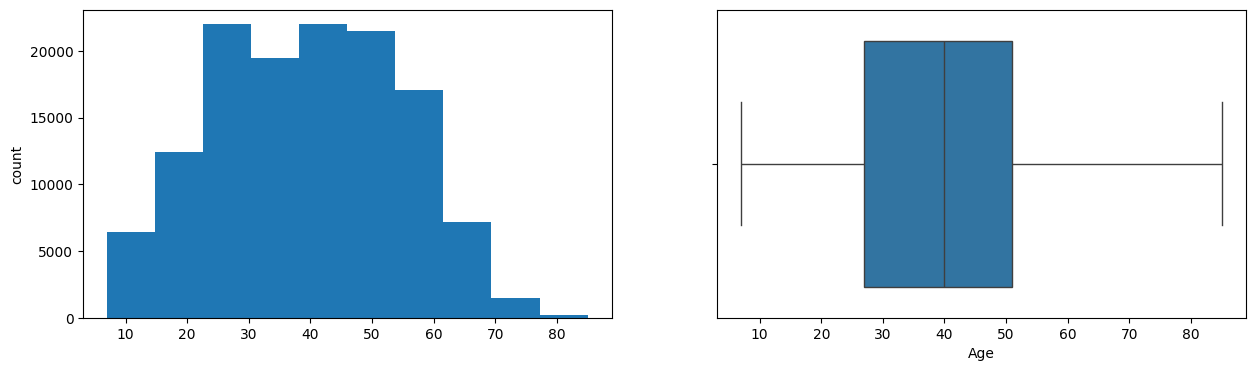

Departure Arrival Time Rating
Skew : -0.33


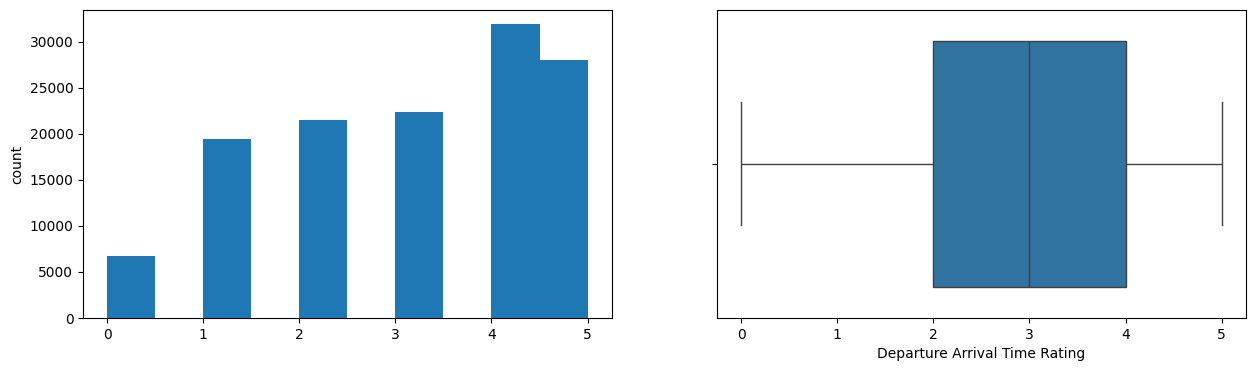

Onboard WiFi Rating
Skew : 0.04


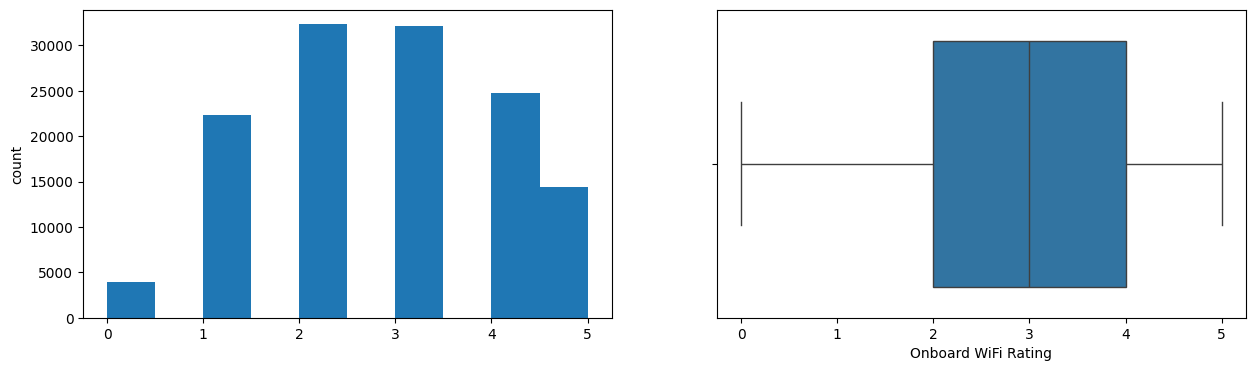

Checkin Rating
Skew : -0.37


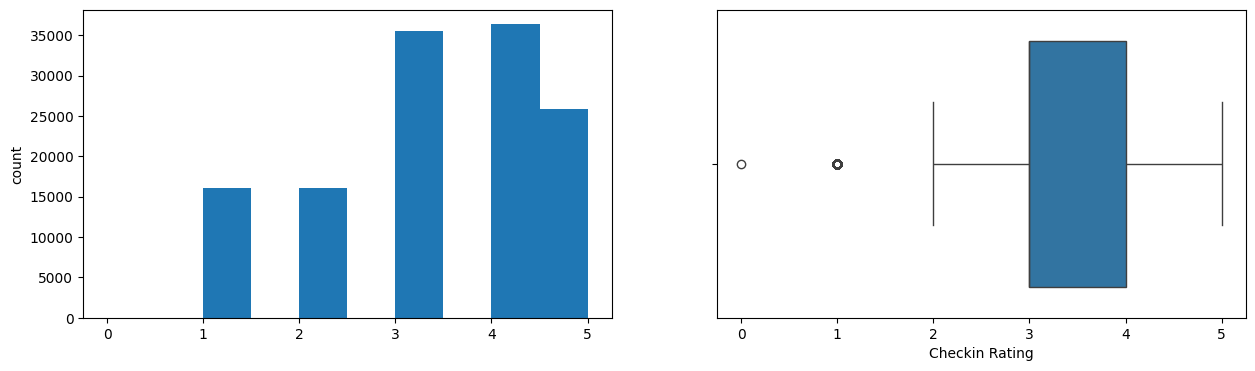

Track Location Rating
Skew : -0.06


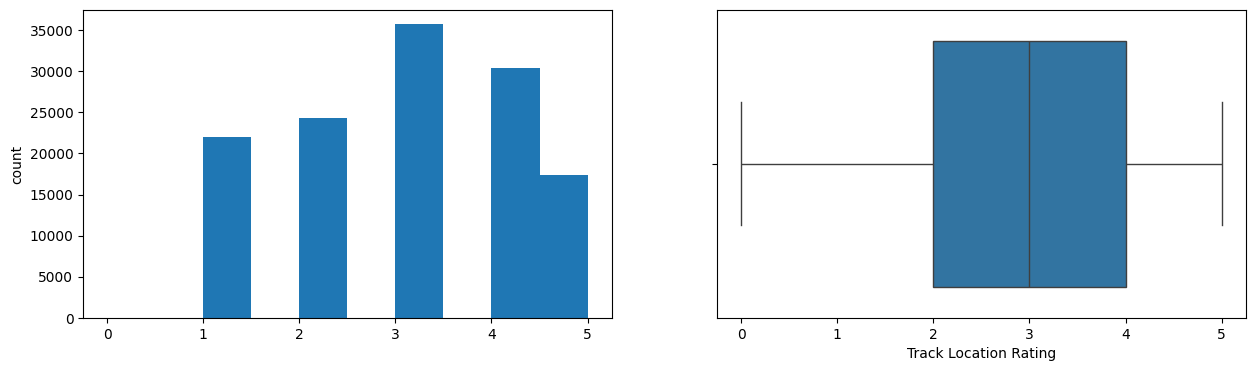

Baggage Handling Rating
Skew : -0.68


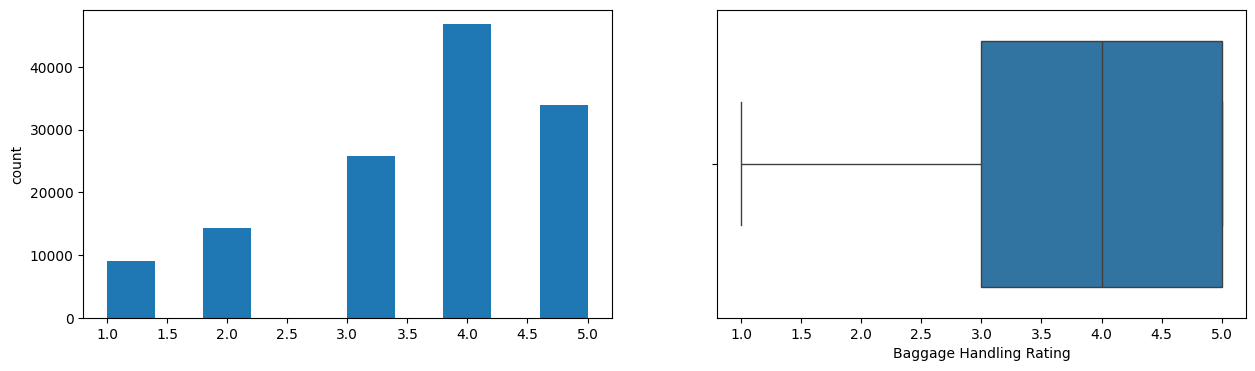

Arrival Delay in Minutes
Skew : 6.68


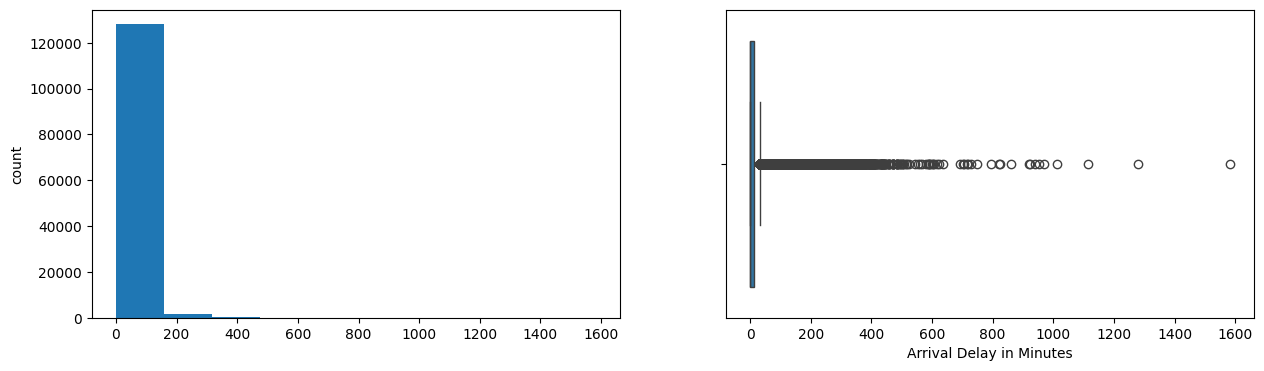

Ticket Class
Skew : 0.45


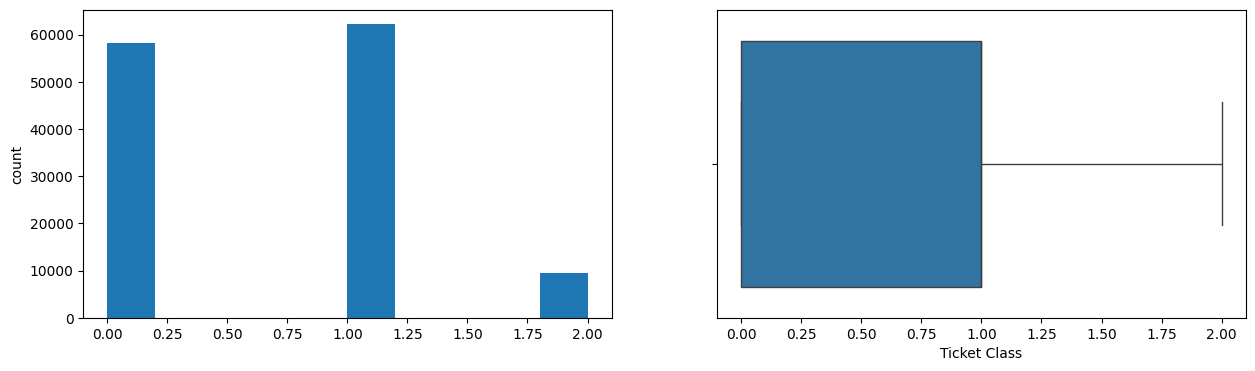

Loyalty
Skew : -1.64


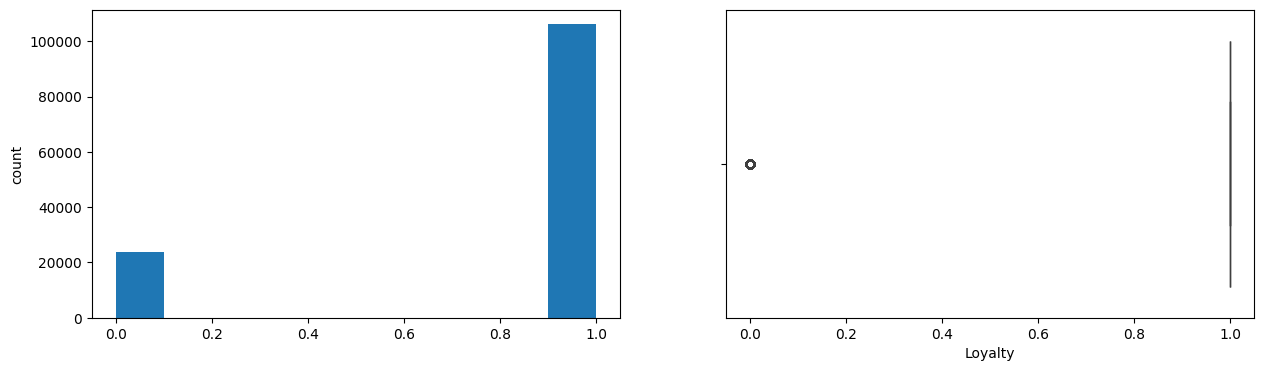

Gender
Skew : 0.03


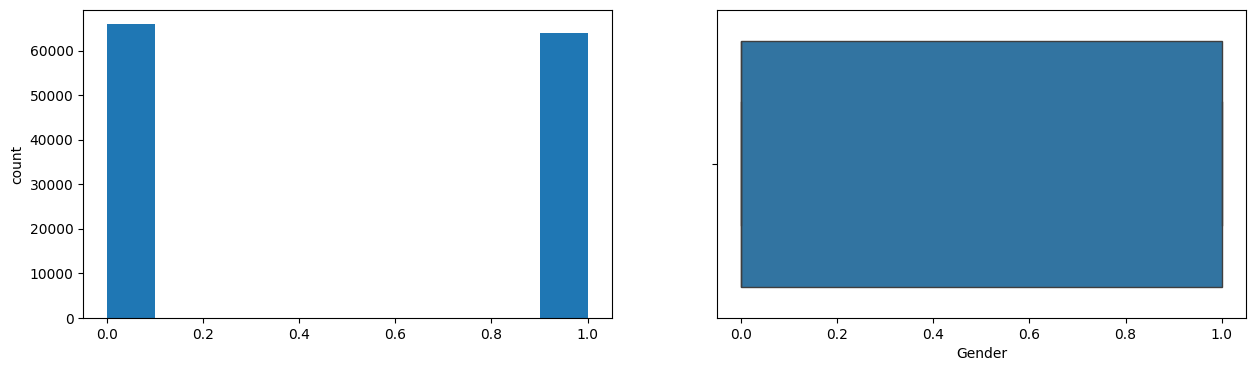

Boarding Rating
Skew : -0.46


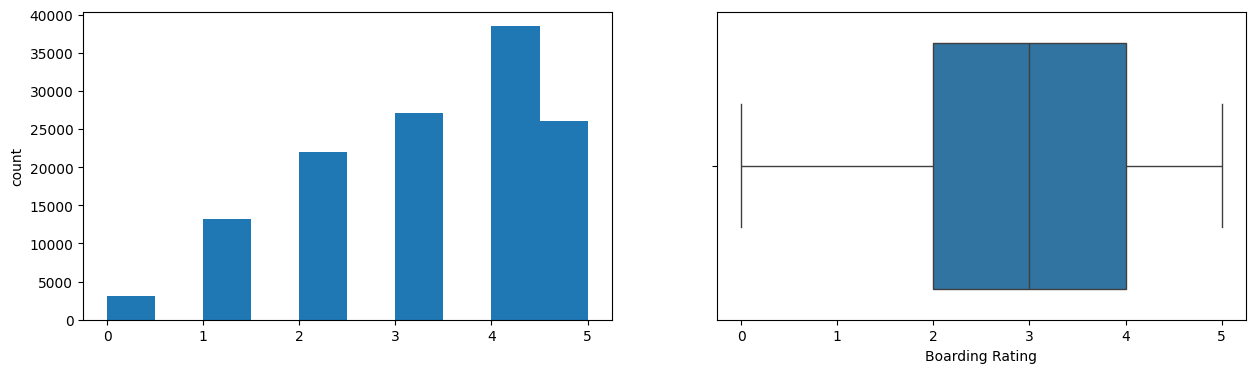

Online Booking Rating
Skew : -0.02


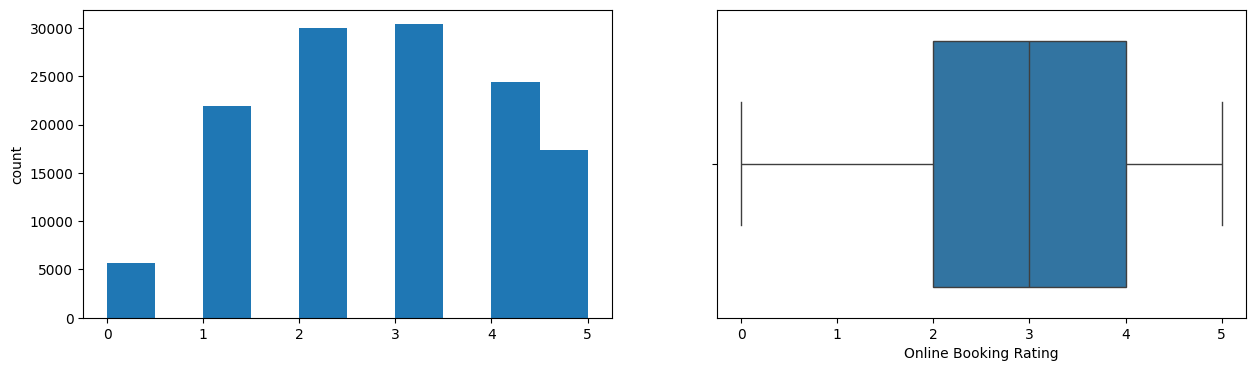

Satisfied
Skew : 0.26


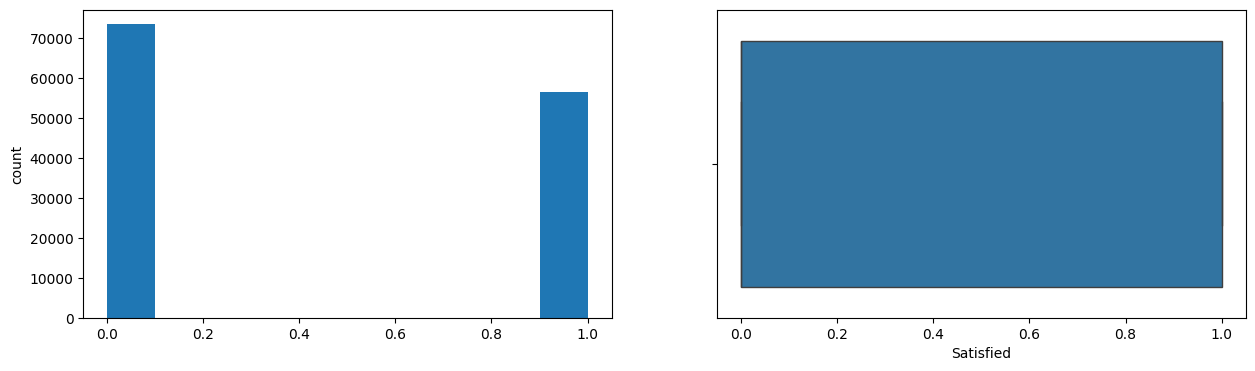

Onboard Entertainment Rating
Skew : -0.37


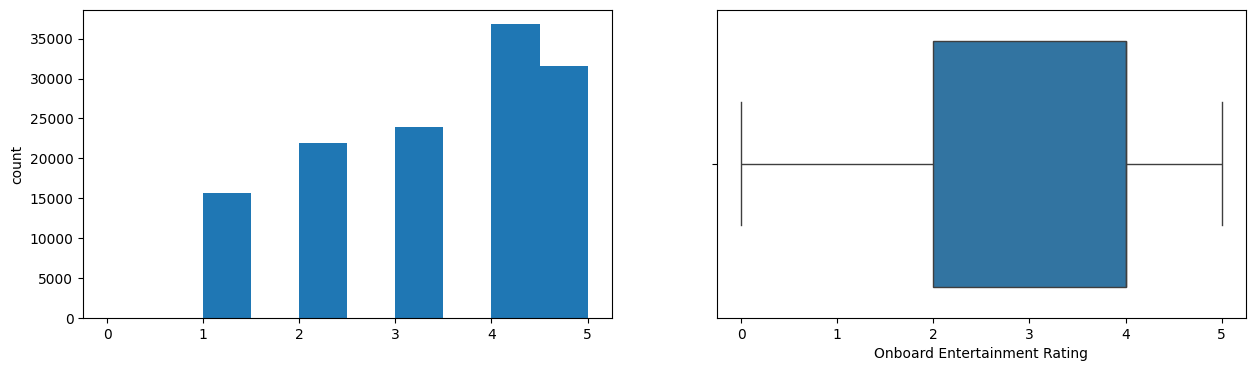

Distance
Skew : 1.11


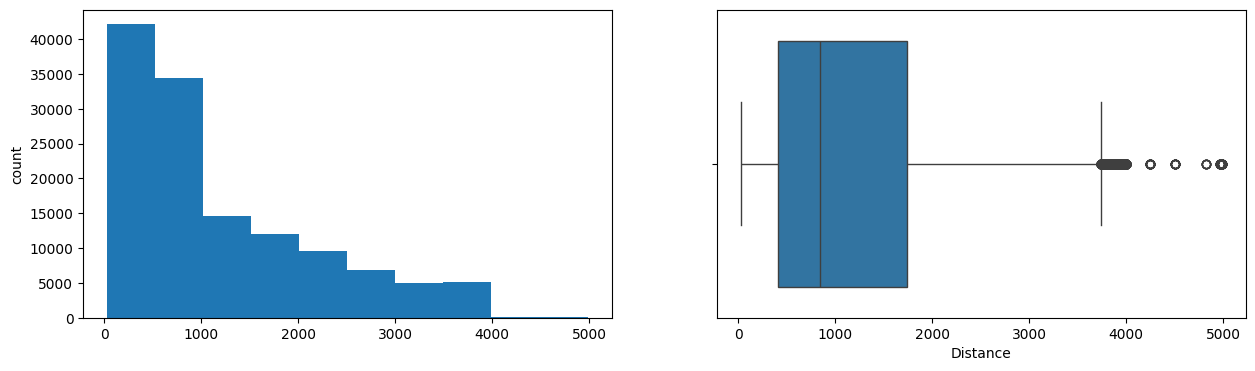

Seat Comfort Rating
Skew : -0.49


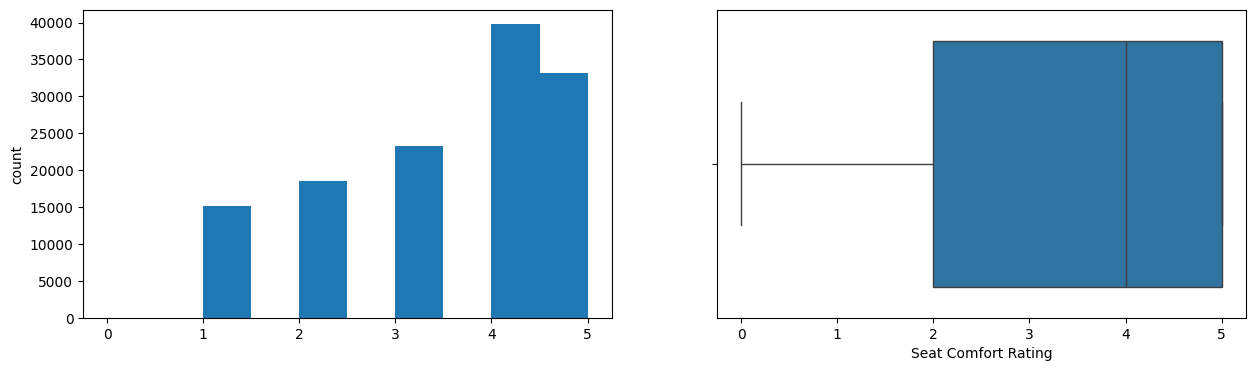

Work or Leisure
Skew : -0.82


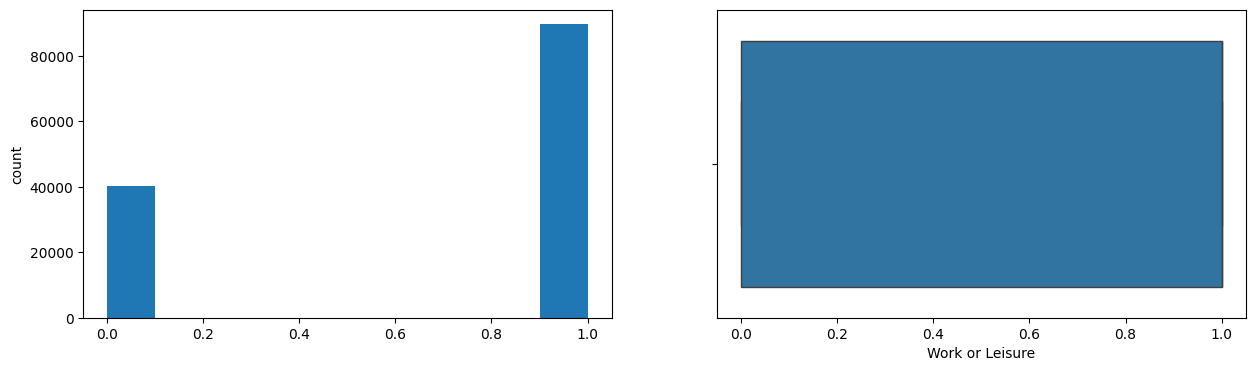

Departure Delay in Minutes
Skew : 6.82


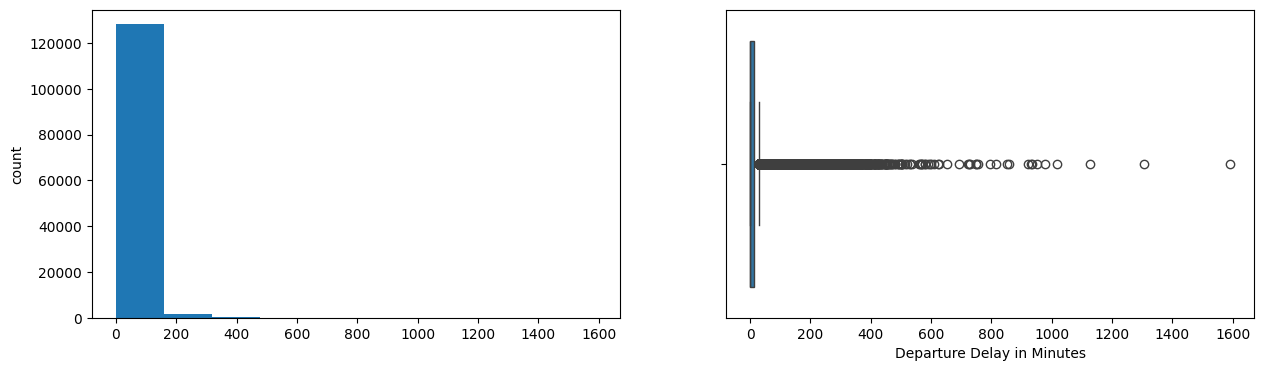

Onboard Service Rating
Skew : -0.42


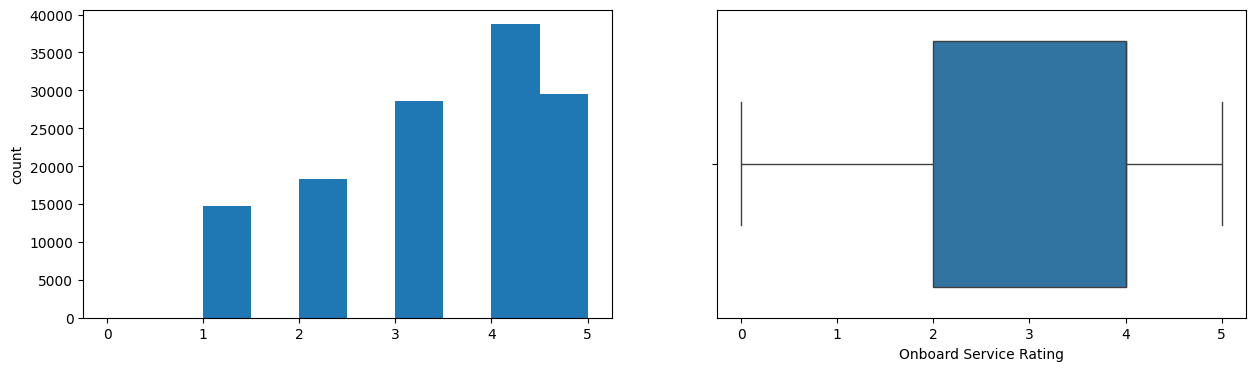

Cleanliness Rating
Skew : -0.3


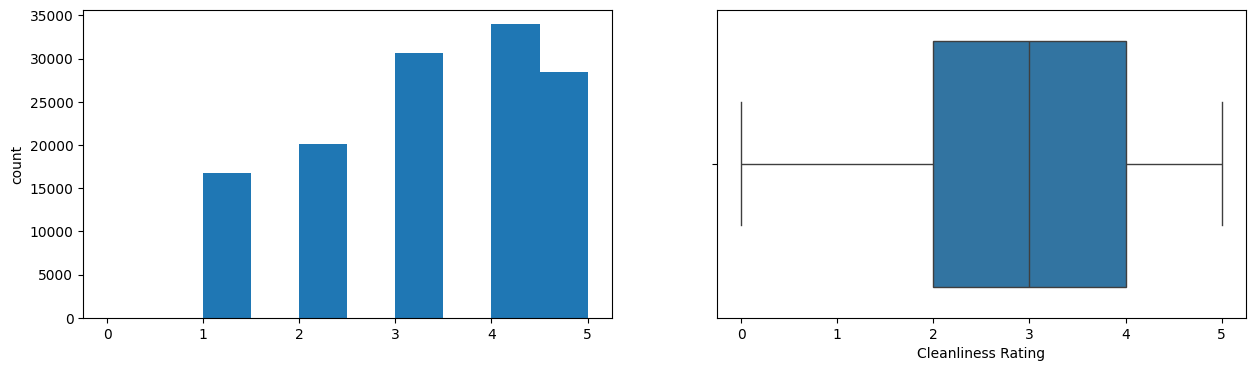

Hour of Day
Skew : 0.02


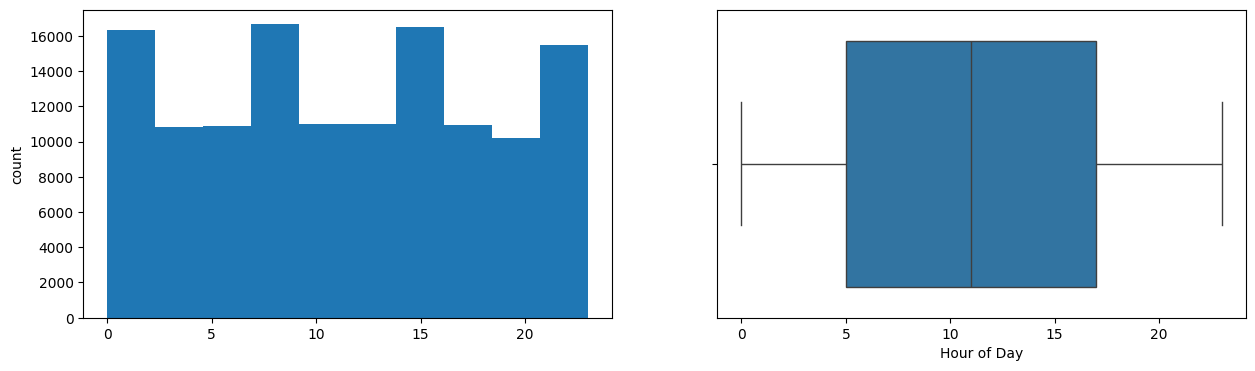

Day of Week
Skew : 0.18


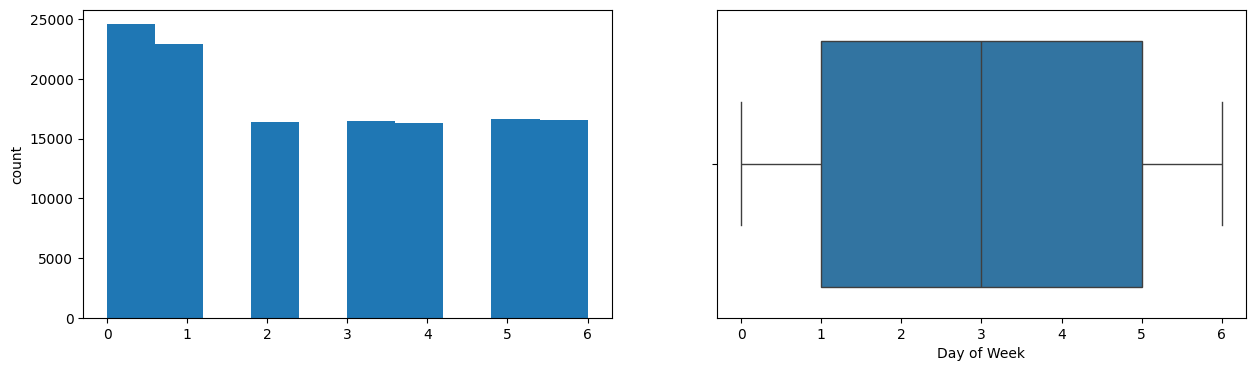

Total Satisfaction Score
Skew : -0.07


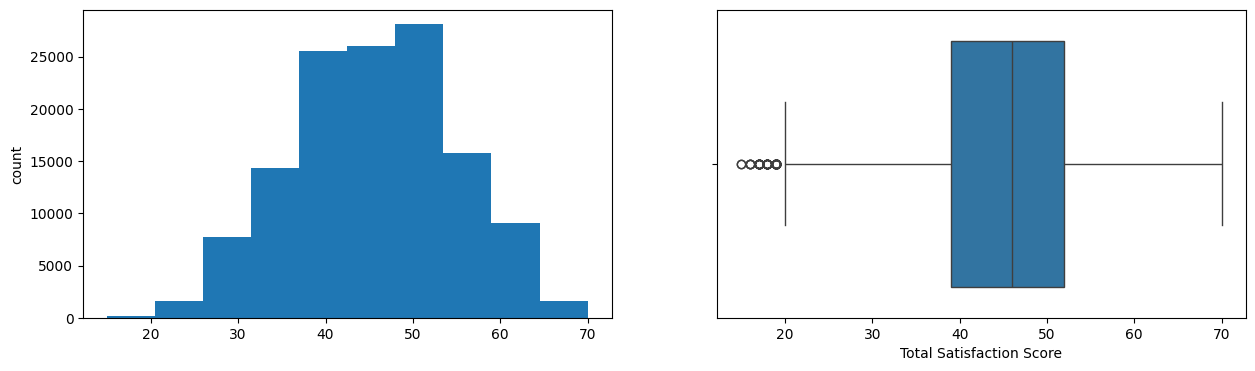

In [133]:
for col in df_trains.columns.tolist():
    print(col)
    print('Skew :', round(df_trains[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df_trains[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_trains[col])
    plt.show()

### Univariate Analysis for CATEGORICAL VARIABLES

'Ticket Class', 'Loyalty', 'Gender', 'Satisfied', 'Work or Leisure'

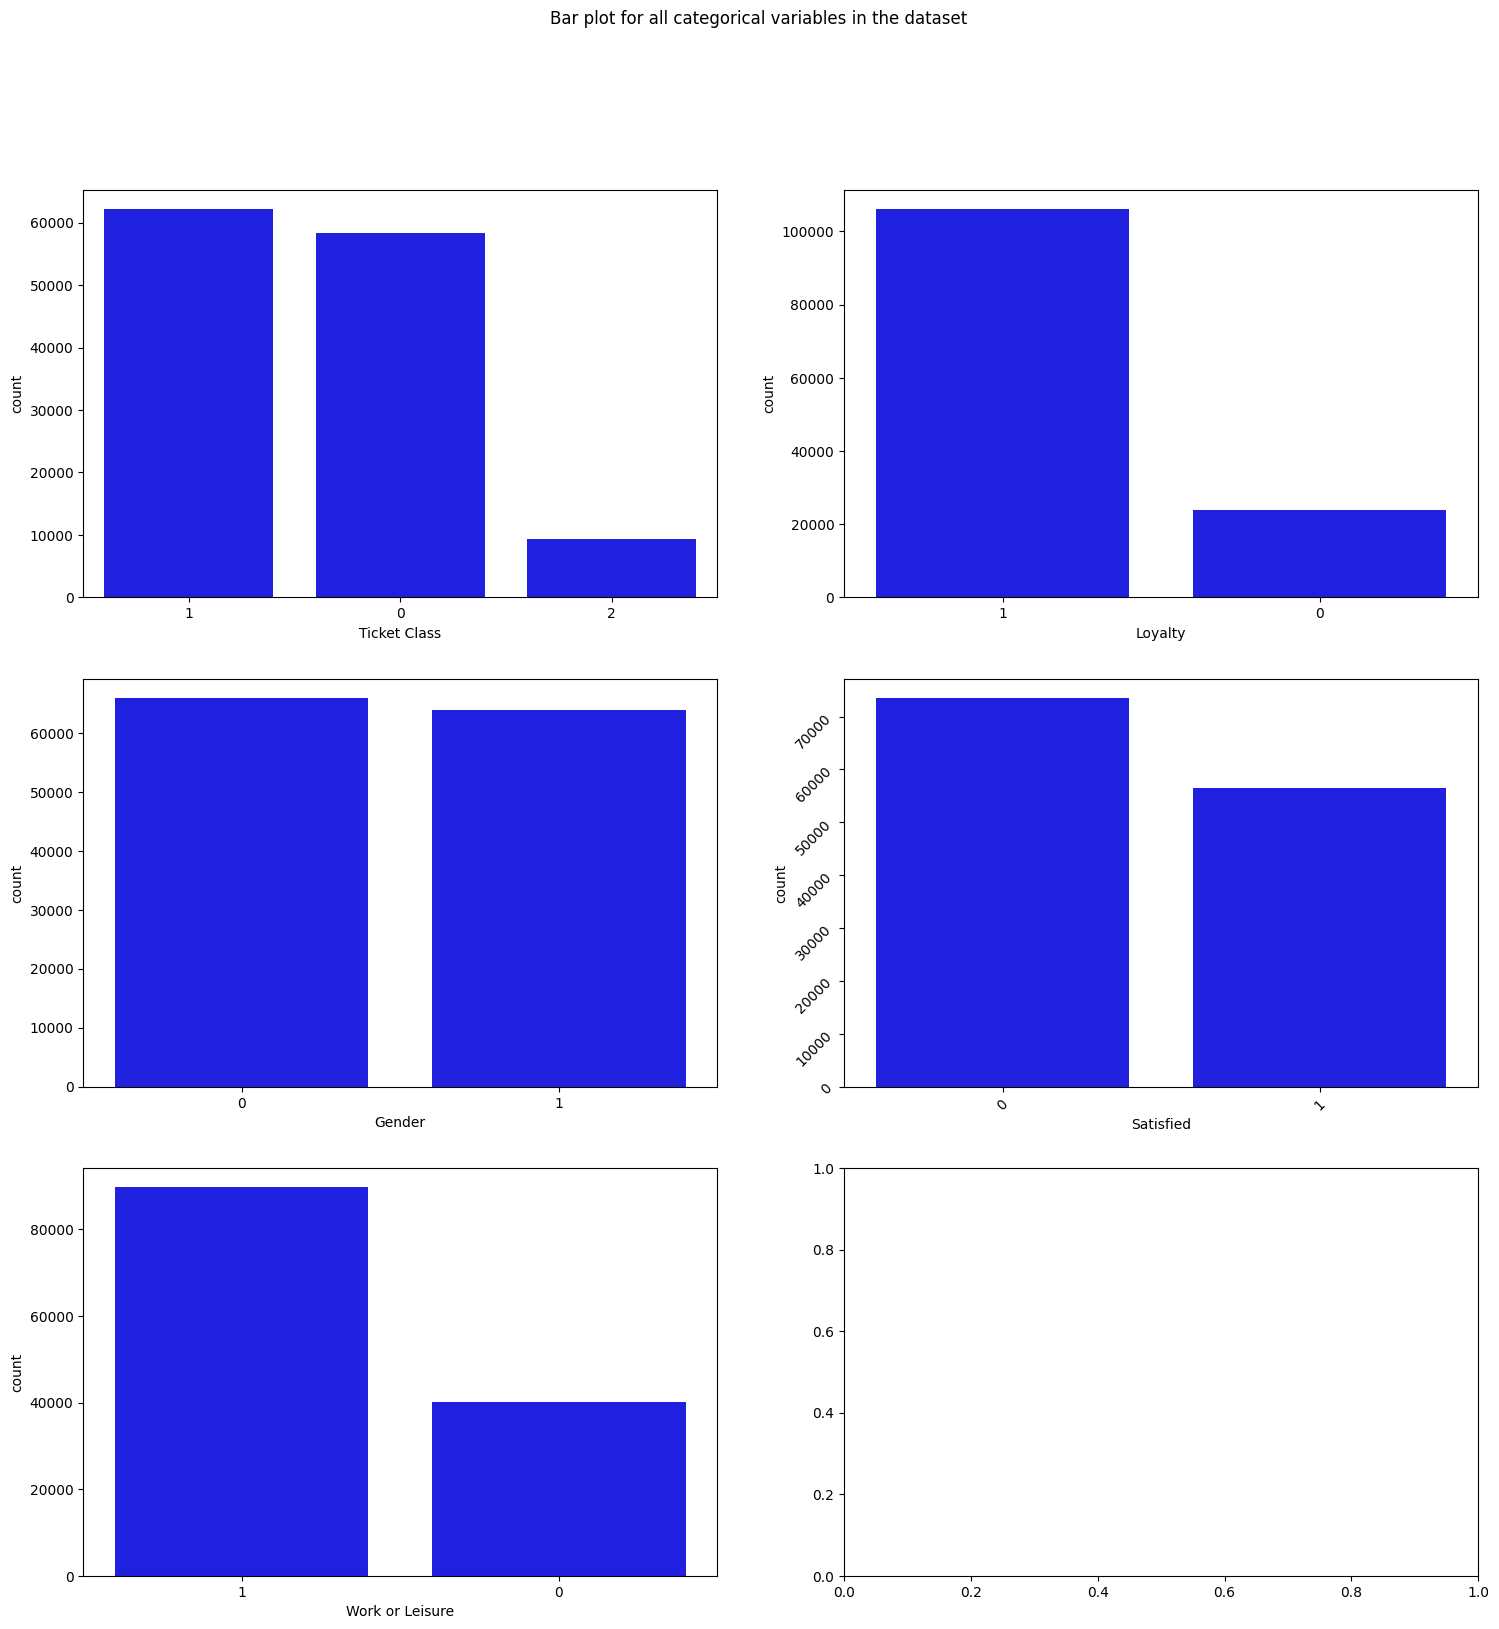

In [139]:
fig, axes = plt.subplots(3, 2, figsize = (18, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'Ticket Class', data = df_trains_cat_not_encoded, color = 'blue', 
              order = df_trains['Ticket Class'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'Loyalty', data = df_trains_cat_not_encoded, color = 'blue', 
              order = df_trains['Loyalty'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'Gender', data = df_trains_cat_not_encoded, color = 'blue', 
              order = df_trains['Gender'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'Satisfied', data = df_trains_cat_not_encoded, color = 'blue', 
              order = df_trains['Satisfied'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'Work or Leisure', data = df_trains_cat_not_encoded, color = 'blue', 
              order = df_trains['Work or Leisure'].head(20).value_counts().index);

axes[1][1].tick_params(labelrotation=45);
axes[1][1].tick_params(labelrotation=45);
axes[1][1].tick_params(labelrotation=45);

- Regarding ticket classes, the 'Premium' (62160/129880 = 47%) and 'Economy' are the most choosen, while 'smart' represents a much smaller group;
- Regarding Loyalty people who are "Loyal" (not sure that this is the sense) are 106100/129880 = 80% of the total
- Regarding Gender they are almost equals
- Regarding Satisfaction, people that are not satisfied represent the 73452/129880 = 56% of the total
- Regarding the reason of the travel, the majority is for work (89693/129880 = 69% of the total)


## Bivariate/Multivariate Analysis

Explore relationships between variables, especially how they relate to customer satisfaction


<Figure size 1300x1700 with 0 Axes>

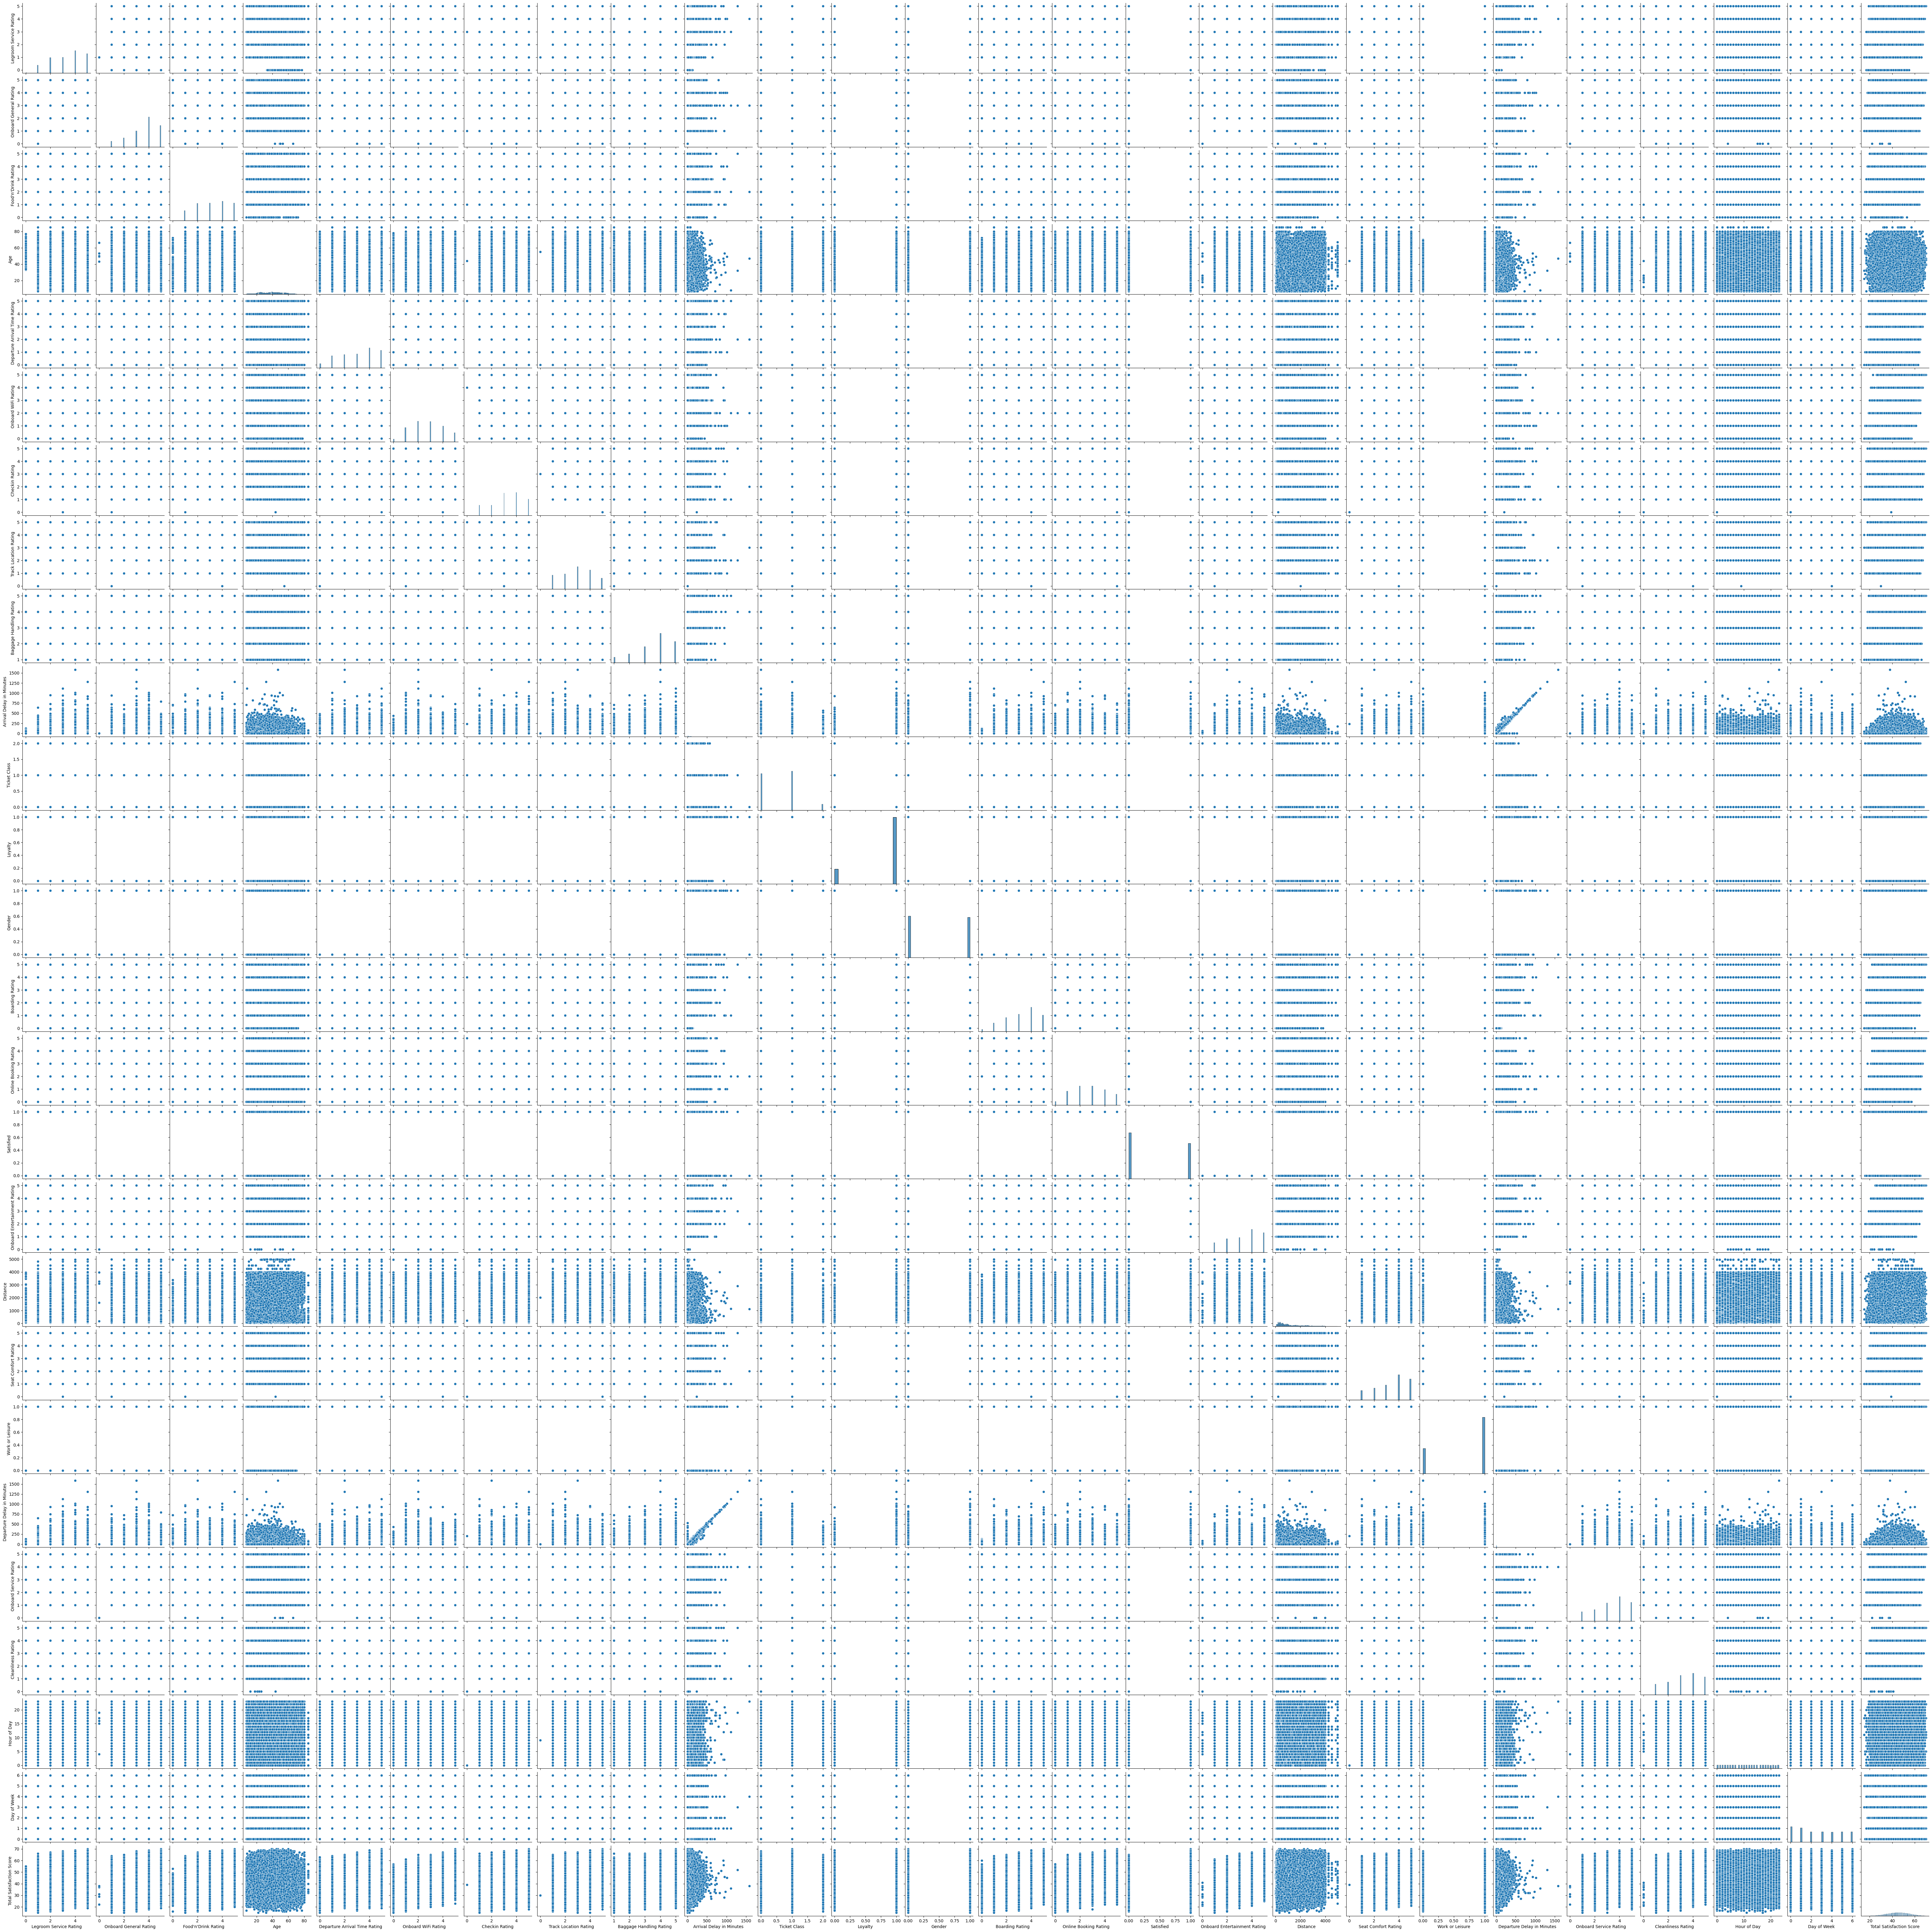

In [143]:
plt.figure(figsize=(13,17))
sns.pairplot(data=df_trains)
plt.show()

## Correlation Analysis

Assess the correlation between different rating features and customer satisfaction

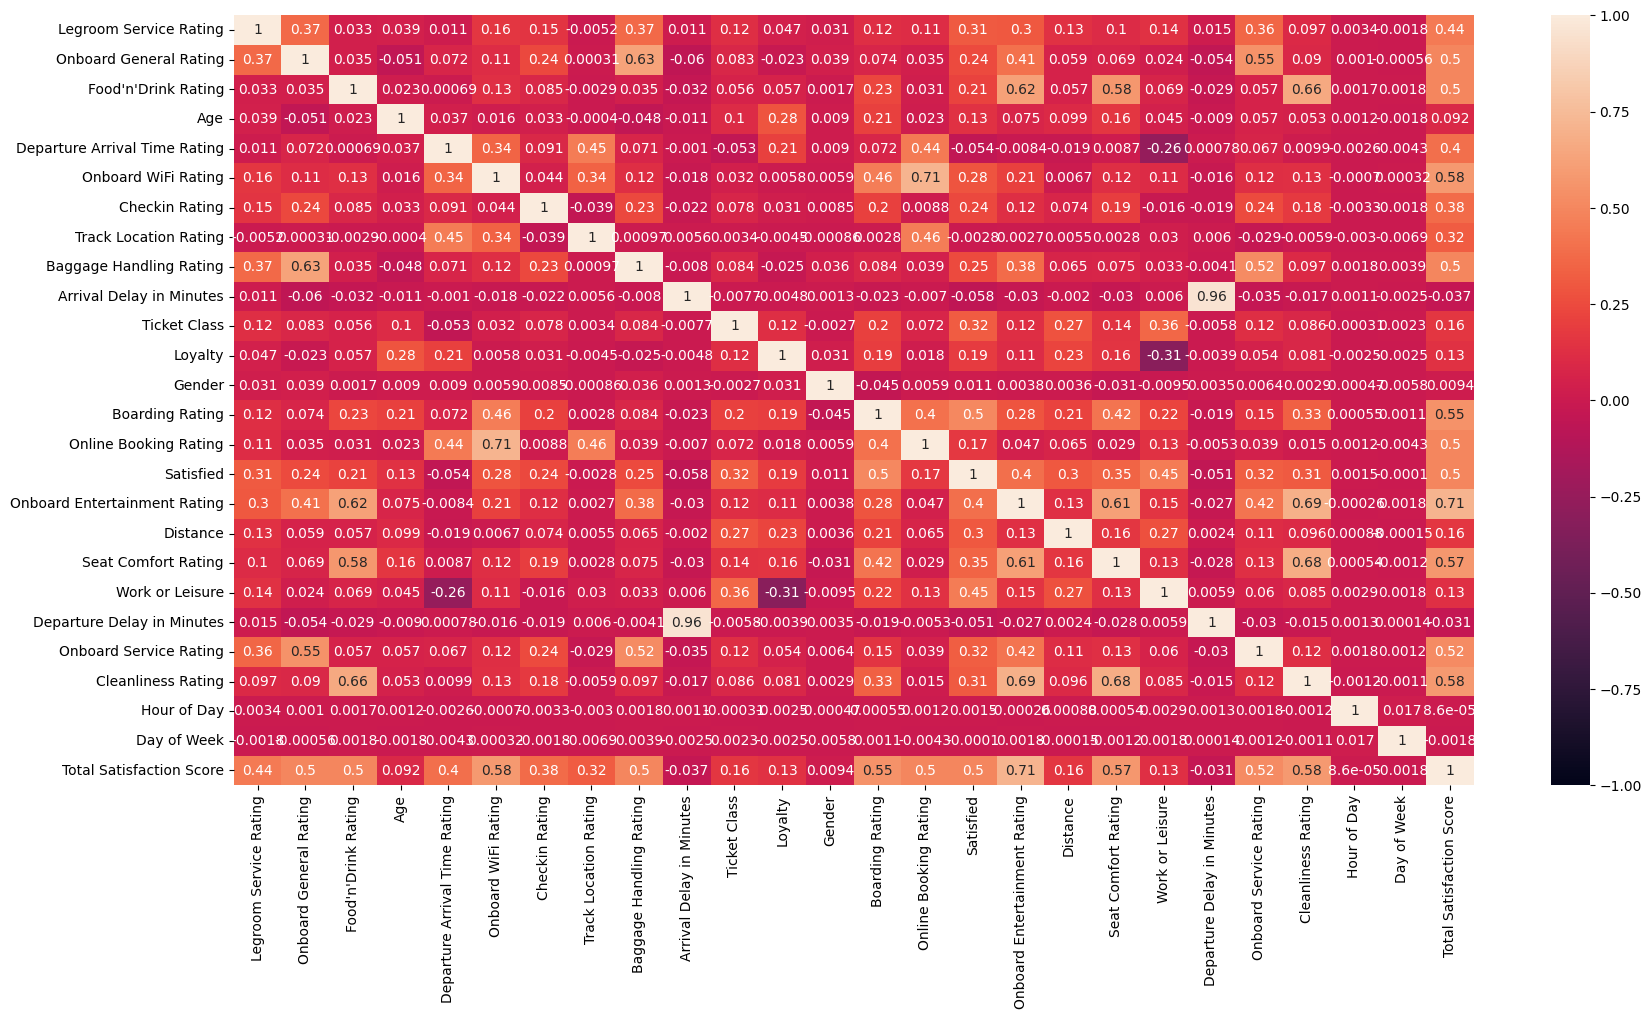

In [145]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_trains.corr(), annot = True, vmin = -1, vmax = 1)
plt.show()